### Import Libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder



### 1. Open Typeform Data from Survey

In [133]:
df = pd.read_csv("../data/typeform_igb.csv")

df.head()

,#,¿En qué rango de edad te encuentras?,¿Cuántas personas sois en vuestro hogar?,¿En qué provincia vives? Vamos a conocernos un poco mejor 😄,¿De cuál de estos temas te interesaría saber más?,¿Cuánto duran tus duchas?,¿Cuántas veces pones la lavadora a la semana?,¿Cuántas veces pones el lavavajillas?,¿Sueles poner el modo *ECO *en tus electrodomésticos?,¿Reciclas agua para usarlo en otras tareas?,...,"cartón y plástico?""""",¿Cada cuánto consumes *carne*?,¿Cuántos km haces a la semana en coche?,¿Cuánto gastas al mes en comida para gato/perro?,¿Cuántos metros cuadrados tiene tu jardín?,¿Sabes cuánto dinero gastas en tu consumo de agua al mes?,Start Date (UTC),Submit Date (UTC),Network ID,Tags;
0,wfp7g5r16gk4o3ywfp7ouby0vjz8vxte,Entre 36 y 65 años,4.0,Burgos,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,No sabía que existía ese modo,Si,...,1 vez cada 3 días,Más de 200 km,No tengo mascota,0,Ni idea!,2023-05-17 13:12:32,2023-05-17 13:15:39,3029c30985,;,NaN
1,w7domx8t90lpqwqpra6w7domx8zcwb2i,Entre 18 y 35 años,3.0,Sevilla,Ahorrar agua,Menos de 5 minutos,Entre 3 y 5 veces,1 vez al día,Siempre,Buena idea! Voy a probarlo!,...,1 vez al día,100 - 200 km,Menos de 50 €,0,Más de 40 €,2023-05-17 13:13:18,2023-05-17 13:14:43,87c9a8af3b,;,NaN
2,vi0fwgu45j71drqcn2ivvi0fwgv3g4gz,Entre 36 y 65 años,1.0,Madrid,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Friego a mano,Siempre,Si,...,1 vez a la semana,No uso coche,No tengo mascota,NaN,Entre 10€ y 40 €,2023-05-17 13:11:34,2023-05-17 13:14:16,35aef30195,;,NaN
3,9sc0qw603ce5q63l48o59sc0qa6eljzc,Entre 18 y 35 años,2.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,1 vez al día,Siempre,Si,...,1 vez cada 3 días,No uso coche,Menos de 50 €,0,Entre 10€ y 40 €,2023-05-17 13:11:41,2023-05-17 13:13:46,46fab8f448,;,NaN
4,dtsgi3y1hsr8v0mopdtsgi3ca83ytuu5,Mayor de 65 años,2.0,Asturias,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,...,1 vez cada 3 días,No uso coche,No tengo mascota,0,Ni idea!,2023-05-17 13:09:38,2023-05-17 13:12:14,3741ab0934,;,NaN


### Lets remove some unnecesary columns that disturb us

In [134]:
# Drop the first column and last two columns
df = df.drop(df.columns[0], axis=1)  
df = df.iloc[:, :-5] 

df.head()

,¿En qué rango de edad te encuentras?,¿Cuántas personas sois en vuestro hogar?,¿En qué provincia vives? Vamos a conocernos un poco mejor 😄,¿De cuál de estos temas te interesaría saber más?,¿Cuánto duran tus duchas?,¿Cuántas veces pones la lavadora a la semana?,¿Cuántas veces pones el lavavajillas?,¿Sueles poner el modo *ECO *en tus electrodomésticos?,¿Reciclas agua para usarlo en otras tareas?,¿*Reciclas *vidrio,"cartón y plástico?""""",¿Cada cuánto consumes *carne*?,¿Cuántos km haces a la semana en coche?,¿Cuánto gastas al mes en comida para gato/perro?,¿Cuántos metros cuadrados tiene tu jardín?
0,Entre 36 y 65 años,4.0,Burgos,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,No sabía que existía ese modo,Si,Siempre,1 vez cada 3 días,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 18 y 35 años,3.0,Sevilla,Ahorrar agua,Menos de 5 minutos,Entre 3 y 5 veces,1 vez al día,Siempre,Buena idea! Voy a probarlo!,A veces,1 vez al día,100 - 200 km,Menos de 50 €,0,Más de 40 €
2,Entre 36 y 65 años,1.0,Madrid,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Friego a mano,Siempre,Si,Siempre,1 vez a la semana,No uso coche,No tengo mascota,NaN,Entre 10€ y 40 €
3,Entre 18 y 35 años,2.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,1 vez al día,Siempre,Si,Siempre,1 vez cada 3 días,No uso coche,Menos de 50 €,0,Entre 10€ y 40 €
4,Mayor de 65 años,2.0,Asturias,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,0,Ni idea!


## 2. Exploratory Data Analysis

### Feature and Target Analysis

The dataset contains a list of Spanish residents behaviour of their personal water consumption.

**Features:**

1. Age: 4 groups of age
2. Residents: Number of people who live in a home.
3. Province: What part of Spain are you from.
4. Interests: 
5. Shower
6. Washing machine
7. Dishwasher
8. Eco Mode
9. Water recycling
10. General recycling
11. Meat Consumption
12. Gasoline
13. Pet
14. Garden area
15. Water estimation spent

**Targets:**

We do not now yet. 

* Expected groups:
    * 0: Water Saver 
    * 1: Water Spender
    * 2: Water unconscious

### Rename columns

In [135]:
list = [ "Age",
 "Residents",
 "Province",
 "Interests",
 "Shower",
 "WashingMachine",
 "DishWasher",
 "EcoMode",
 "WaterRecycling",
 "GeneralRecycling",
 "Meat",
 "Gasoline",
 "Pet",
"Garden",
 "Estimation"]

for index,name in enumerate(list):
    df.rename(columns={df.columns[index]: name}, inplace=True)

df.head()

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Entre 36 y 65 años,4.0,Burgos,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,No sabía que existía ese modo,Si,Siempre,1 vez cada 3 días,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 18 y 35 años,3.0,Sevilla,Ahorrar agua,Menos de 5 minutos,Entre 3 y 5 veces,1 vez al día,Siempre,Buena idea! Voy a probarlo!,A veces,1 vez al día,100 - 200 km,Menos de 50 €,0,Más de 40 €
2,Entre 36 y 65 años,1.0,Madrid,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Friego a mano,Siempre,Si,Siempre,1 vez a la semana,No uso coche,No tengo mascota,NaN,Entre 10€ y 40 €
3,Entre 18 y 35 años,2.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,1 vez al día,Siempre,Si,Siempre,1 vez cada 3 días,No uso coche,Menos de 50 €,0,Entre 10€ y 40 €
4,Mayor de 65 años,2.0,Asturias,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,0,Ni idea!


### Paint some Data 👨🏻‍🎨

In [136]:
# PAIR PLOT

colors = [ '#ee6c4d', '#98c1d9', '#3d5a80', '#293241']
sns.set_palette(sns.color_palette(colors))

Entre 36 y 65 años    537
Entre 18 y 35 años    372
Mayor de 65 años       72
Menor de 18 años       19
NaN                     5
Name: Age, dtype: int64


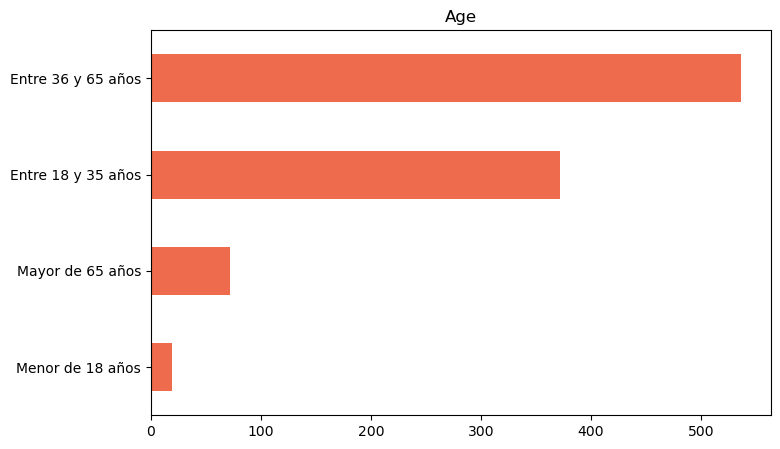

2.0     290
4.0     251
3.0     249
1.0     100
5.0      85
6.0      15
7.0       6
NaN       5
10.0      2
8.0       2
Name: Residents, dtype: int64


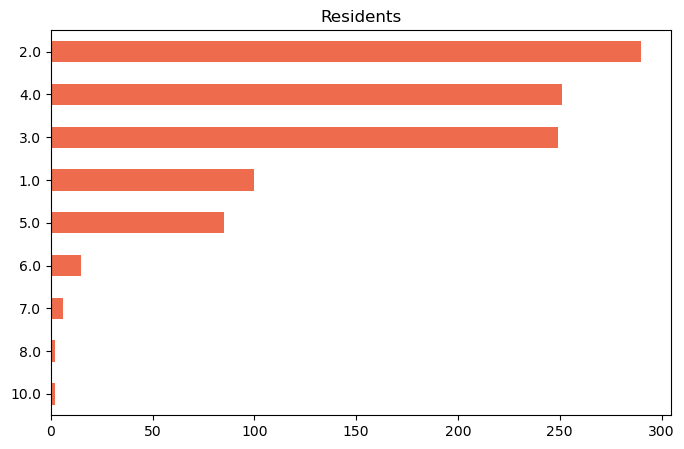

Madrid                    541
Segovia                   160
Asturias                   37
Barcelona                  31
Sevilla                    24
Toledo                     21
Cádiz                      14
Valladolid                 13
Cantabria                  12
A Coruña                   10
Málaga                      9
Pontevedra                  7
Huesca                      7
Murcia                      7
Zaragoza                    7
Valencia                    7
Alicante                    6
Jaén                        5
Las Palmas                  5
Lugo                        4
Vizcaya                     4
León                        4
Salamanca                   4
Huelva                      4
Gipuzkoa                    4
Girona                      4
NaN                         3
Badajoz                     3
La Rioja                    3
Ávila                       3
Burgos                      3
Tarragona                   3
Teruel                      3
Albacete  

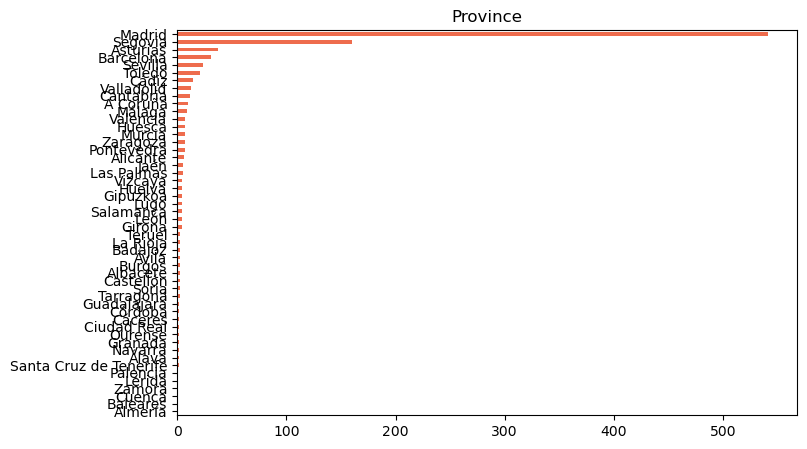

Ayudar al ecosistema         361
Ahorrar agua                 278
Ahorrar dinero               238
Conocer mi huella hídrica    125
NaN                            3
Name: Interests, dtype: int64


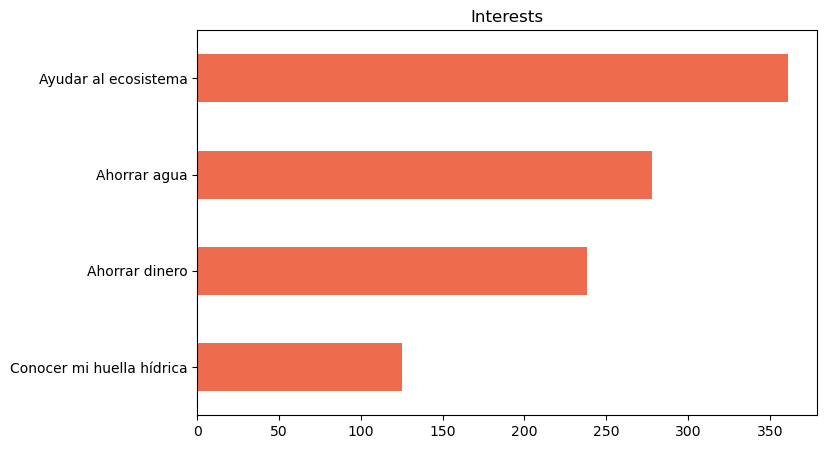

Entre 5 y 10 minutos     495
Menos de 5 minutos       346
Entre 11 y 15 minutos    125
Más de 15 minutos         36
NaN                        3
Name: Shower, dtype: int64


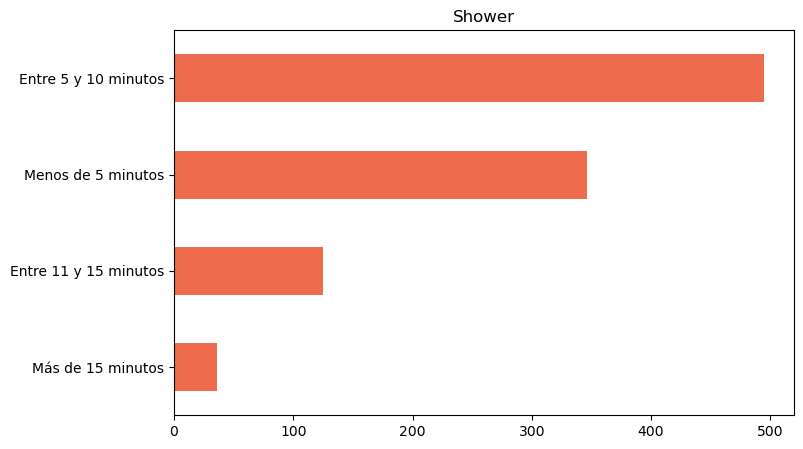

Menos de 3 veces     541
Entre 3 y 5 veces    348
Más de 5             113
NaN                    3
Name: WashingMachine, dtype: int64


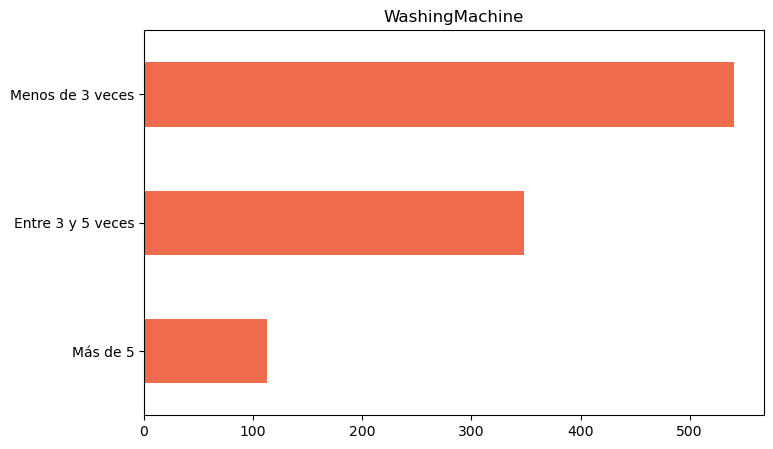

Entre 3 y 5 a la semana    506
Friego a mano              303
1 vez al día               193
NaN                          3
Name: DishWasher, dtype: int64


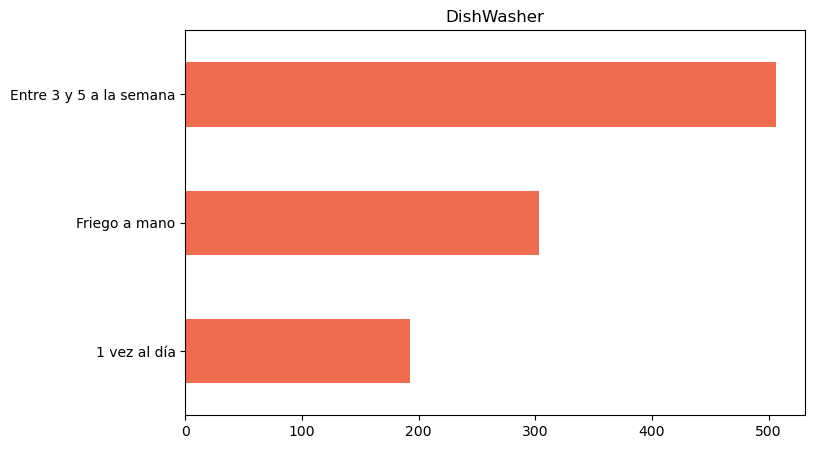

Siempre                          462
A veces                          398
No sabía que existía ese modo    142
NaN                                3
Name: EcoMode, dtype: int64


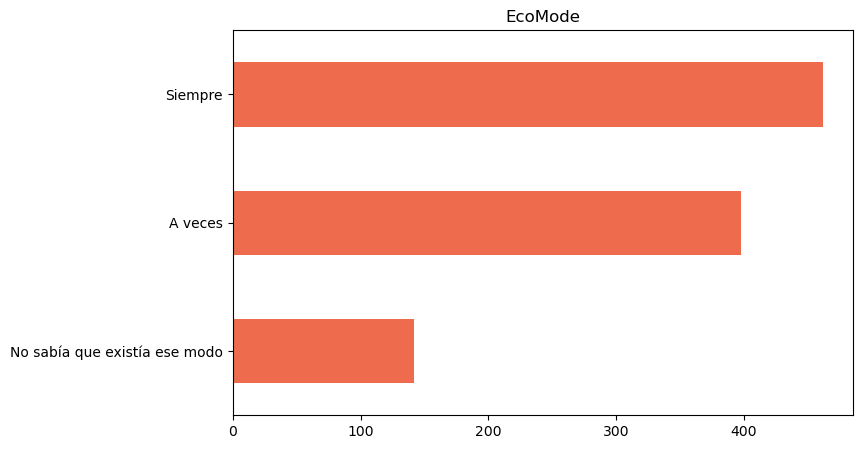

No                             520
Si                             290
Buena idea! Voy a probarlo!    192
NaN                              3
Name: WaterRecycling, dtype: int64


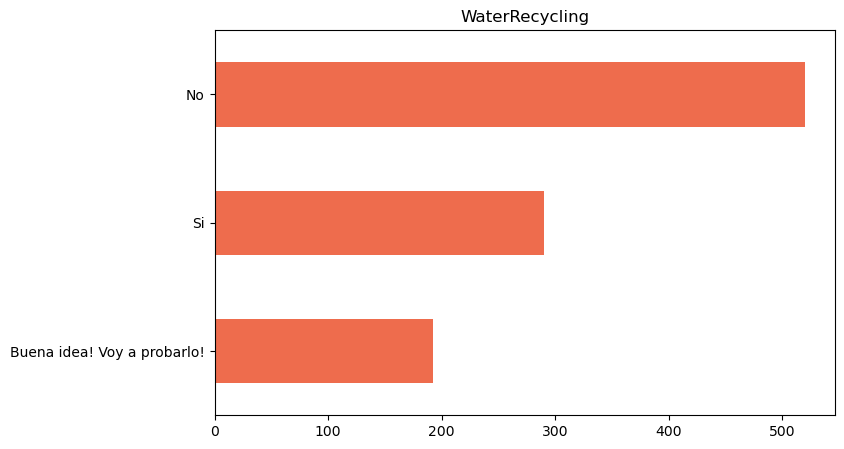

Siempre    686
A veces    263
Nunca!      53
NaN          3
Name: GeneralRecycling, dtype: int64


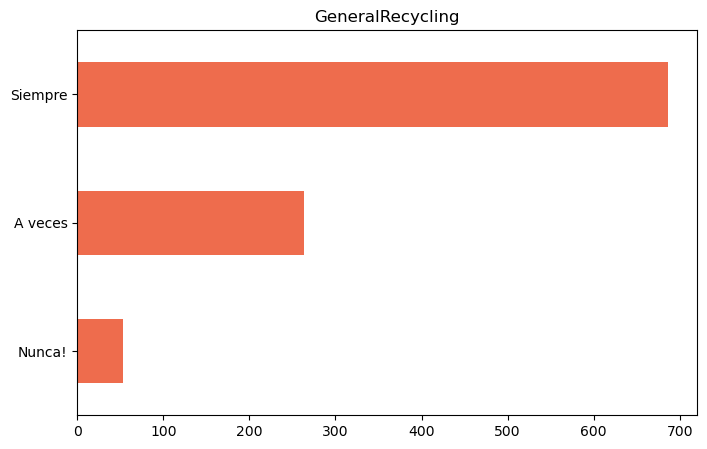

1 vez cada 3 días    499
1 vez al día         314
1 vez a la semana    156
Nunca!                33
NaN                    3
Name: Meat, dtype: int64


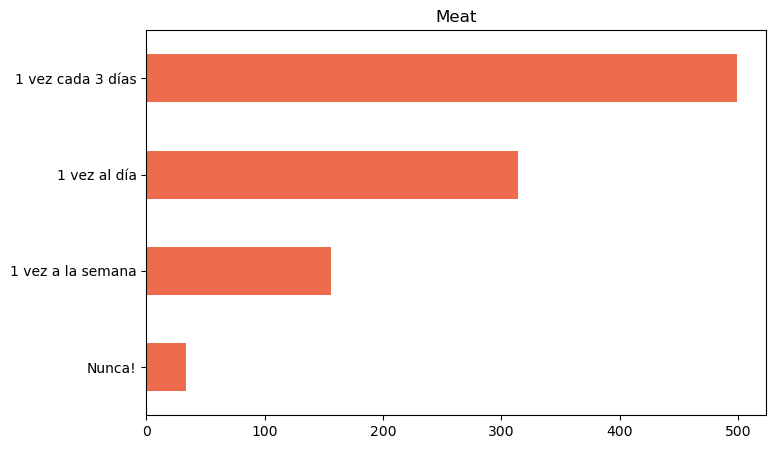

Menos de 100 km    444
No uso coche       261
100 - 200 km       177
Más de 200 km      120
NaN                  3
Name: Gasoline, dtype: int64


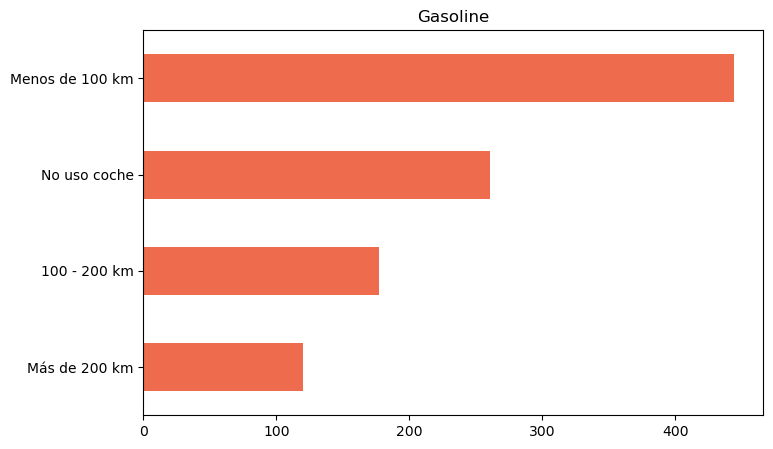

No tengo mascota    638
Menos de 50 €       224
Entre 50 y 100 €    126
Más de 100 €         14
NaN                   3
Name: Pet, dtype: int64


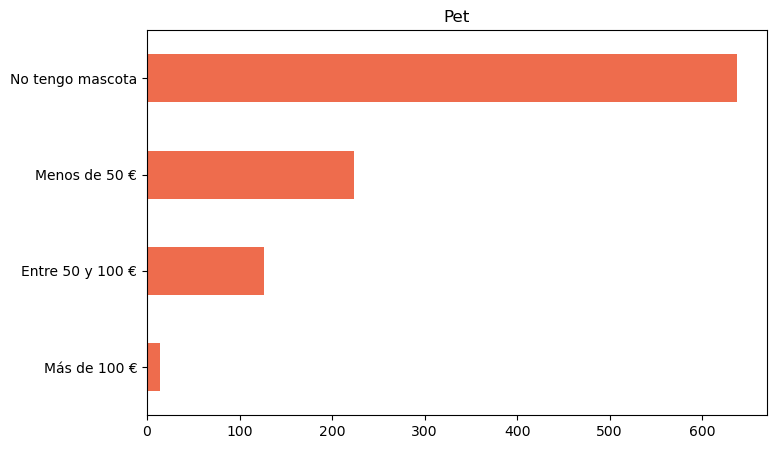

0              675
NaN             59
50              18
100             17
30              16
              ... 
75               1
4                1
2.0              1
6                1
Ojalá tener      1
Name: Garden, Length: 91, dtype: int64


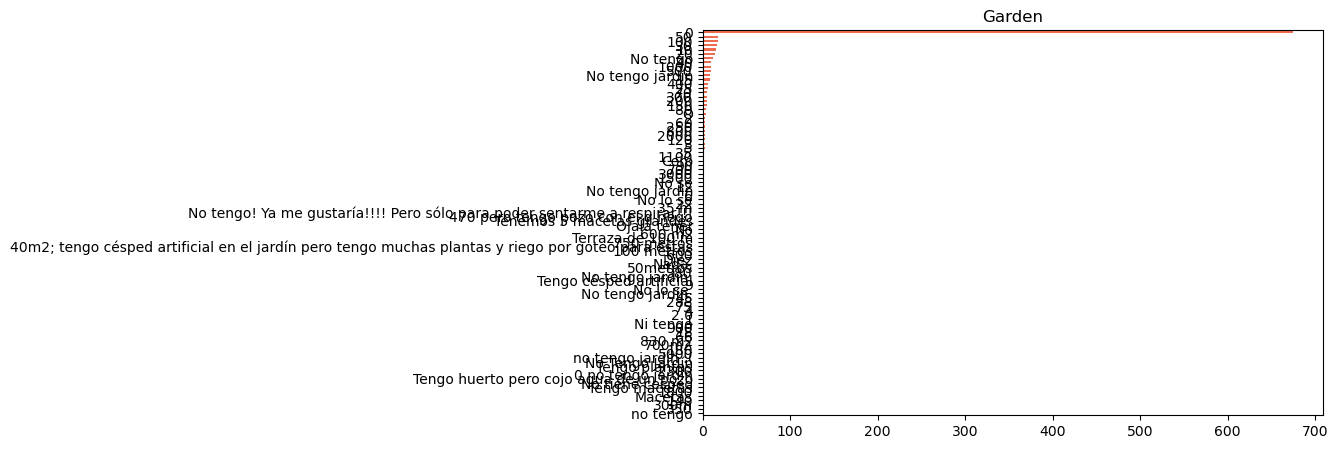

Entre 10€ y 40 €    504
Ni idea!            282
Más de 40 €         140
Menos de 10 €        74
NaN                   5
Name: Estimation, dtype: int64


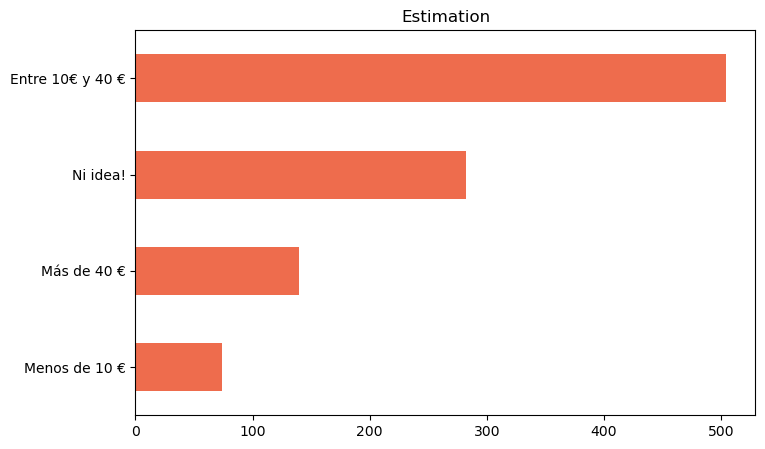

In [137]:
def plot_graph (column):
    print(df[column].value_counts(dropna= False))
    plt.figure(figsize=(8, 5))
    df[column].value_counts().sort_values(ascending=True).plot(kind='barh', ylabel= None, title= str(column))
    plt.show()


for i in list:
    plot_graph(i)


#### Check and Handle NaN



In [139]:
# All columns are type object, except residents float64

# Check for any NaN in df
print("Original length of df: ",len(df))
df.isna().sum()

Original length of df:  1005


Age                  5
Residents            5
Province             3
Interests            3
Shower               3
WashingMachine       3
DishWasher           3
EcoMode              3
WaterRecycling       3
GeneralRecycling     3
Meat                 3
Gasoline             3
Pet                  3
Garden              59
Estimation           5
dtype: int64

In [ ]:
df[df['Garden'].str.contains("tengo")] = 0

values = df["Garden"][df["Garden"].str.len() > 3]
values.to_excel(r'./results/garden.xlsx',sheet_name='train', index=False)
print(values)

### Feature Engineering

In [ ]:
# Pet Column: we are interested in knowing if they have or not.
df.loc[df["Pet"] == 'No tengo mascota', "Pet"] = "No"
df.loc[df["Pet"] != 'No', "Pet"] = "Yes"

### Car Column: we are interested in knowing if they use the car or not.
df.loc[df["Gasoline"] == 'No uso coche', "Gasoline"] = "No"
df.loc[df["Gasoline"] != 'No', "Gasoline"] = "Yes"

# Meat Column: we are interested in knowing if they are meat eaters or not.
df.loc[df["Meat"] == 'Nunca!', "Meat"] = "No"
df.loc[df["Meat"] != 'No', "Meat"] = "Yes"

# Estimation Column: we are interested in knowing if they are aware with their water expenditure or not.
df.loc[df["Estimation"] == 'Ni idea!', "Estimation"] = "No"
df.loc[df["Estimation"] != 'No', "Estimation"] = "Yes"

# Garden Column: have or not garden.
df.loc[df["Estimation"] == 'Ni idea!', "Estimation"] = "No"
df.loc[df["Estimation"] != 'No', "Estimation"] = "Yes"

0         0
1         0
2       NaN
3         0
4         0
       ... 
1000      0
1001      0
1002      0
1003    NaN
1004    NaN
Name: Garden, Length: 1005, dtype: object


In [130]:
df.head()

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Entre 36 y 65 años,4.0,Burgos,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,No sabía que existía ese modo,Si,Siempre,Yes,Yes,No,0,No
1,Entre 18 y 35 años,3.0,Sevilla,Ahorrar agua,Menos de 5 minutos,Entre 3 y 5 veces,1 vez al día,Siempre,Buena idea! Voy a probarlo!,A veces,Yes,Yes,Yes,0,Yes
2,Entre 36 y 65 años,1.0,Madrid,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Friego a mano,Siempre,Si,Siempre,Yes,No,No,NaN,Yes
3,Entre 18 y 35 años,2.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,1 vez al día,Siempre,Si,Siempre,Yes,No,Yes,0,Yes
4,Mayor de 65 años,2.0,Asturias,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,Yes,No,No,0,No


Original length of df:  1005


Age                  5
Residents            5
Province             3
Interests            3
Shower               3
WashingMachine       3
DishWasher           3
EcoMode              3
WaterRecycling       3
GeneralRecycling     3
Meat                 3
Gasoline             3
Pet                  3
Garden              59
Estimation           5
dtype: int64

In [68]:
# Remove rows with NaN values
df = df.dropna()

print("Length with NaN removed: ",len(df))
# Check all are removed
df.isna().sum()

Length with NaN removed:  946


Age                 0
Residents           0
Province            0
Interests           0
Shower              0
WashingMachine      0
DishWasher          0
EcoMode             0
WaterRecycling      0
GeneralRecycling    0
Meat                0
Gasoline            0
Pet                 0
Garden              0
Estimation          0
dtype: int64

### Convert categorical features into integers

In [70]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        
        df[column] = le.fit_transform(df[column])

df

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,1,4.0,8,2,1,0,1,1,2,2,2,2,3,0,3
1,0,3.0,38,0,2,0,0,2,0,0,1,0,1,0,2
3,0,2.0,37,2,2,1,0,2,2,2,2,3,1,0,0
4,2,2.0,4,2,1,0,1,0,1,2,2,3,3,0,3
5,0,2.0,38,1,2,1,1,2,0,0,2,3,3,76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,1,4.0,28,0,1,0,1,0,1,2,1,1,3,0,3
999,1,5.0,28,1,2,2,1,1,1,1,0,0,3,0,0
1000,0,3.0,28,3,0,1,1,0,0,0,1,2,0,0,0
1001,0,4.0,28,1,1,0,2,0,1,2,1,2,3,0,0


### Feature scaling

In [71]:
# Convert float64 column => int64
for column in df.select_dtypes(include=['float64']):
    df[column] = df[column].astype('int64')

In [72]:
from sklearn.preprocessing import MinMaxScaler

cols = df.columns

ms = MinMaxScaler()

X = ms.fit_transform(df)
X = pd.DataFrame(X, columns=[cols])

X.head()

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,0.333333,0.333333,0.163265,0.666667,0.333333,0.0,0.5,0.5,1.0,1.0,0.666667,0.666667,1.000000,0.000000,1.000000
1,0.000000,0.222222,0.775510,0.000000,0.666667,0.0,0.0,1.0,0.0,0.0,0.333333,0.000000,0.333333,0.000000,0.666667
2,0.000000,0.111111,0.755102,0.666667,0.666667,0.5,0.0,1.0,1.0,1.0,0.666667,1.000000,0.333333,0.000000,0.000000
3,0.666667,0.111111,0.081633,0.666667,0.333333,0.0,0.5,0.0,0.5,1.0,0.666667,1.000000,1.000000,0.000000,1.000000
4,0.000000,0.111111,0.775510,0.333333,0.666667,0.5,0.5,1.0,0.0,0.0,0.666667,1.000000,1.000000,0.853933,0.000000


## K-Means model with two clusters

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42) 

kmeans.fit(X)

/Users/ignaciogarciabarrero/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [75]:
# Here we can see the N number of centroids of each cluster
kmeans.cluster_centers_

array([[0.22265122, 0.22179322, 0.59262469, 0.41827542, 0.3976834 ,
        0.4034749 , 0.5984556 , 0.51351351, 0.4980695 , 0.03667954,
        0.45945946, 0.45945946, 0.67052767, 0.10073316, 0.38738739],
       [0.26086957, 0.21225845, 0.56066992, 0.44565217, 0.45471014,
        0.37771739, 0.57201087, 0.95923913, 0.56793478, 0.98641304,
        0.4692029 , 0.51630435, 0.75      , 0.11929043, 0.31793478],
       [0.23928945, 0.24312086, 0.55300365, 0.46708464, 0.42842215,
        0.37774295, 0.50470219, 0.06112853, 0.56112853, 0.97178683,
        0.48484848, 0.47648903, 0.73145246, 0.12190483, 0.49111808]])

In [76]:
# The lesser the model inertia, the better the model fit.
kmeans.inertia_

# We can see that the model has very high inertia. So, this is not a good model fit to the data.

1212.5399695776214

In [77]:
# column_name_types = df.columns.to_series().dtypes

# print(column_name_types)

df

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,1,4,8,2,1,0,1,1,2,2,2,2,3,0,3
1,0,3,38,0,2,0,0,2,0,0,1,0,1,0,2
3,0,2,37,2,2,1,0,2,2,2,2,3,1,0,0
4,2,2,4,2,1,0,1,0,1,2,2,3,3,0,3
5,0,2,38,1,2,1,1,2,0,0,2,3,3,76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,1,4,28,0,1,0,1,0,1,2,1,1,3,0,3
999,1,5,28,1,2,2,1,1,1,1,0,0,3,0,0
1000,0,3,28,3,0,1,1,0,0,0,1,2,0,0,0
1001,0,4,28,1,1,0,2,0,1,2,1,2,3,0,0


In [78]:
from sklearn.cluster import KMeans
cs = []


X = df.iloc[:, [2, 3]].values


X
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#     kmeans.fit(X)
#     cs.append(kmeans.inertia_)
# plt.plot(range(1, 11), cs)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('CS')
# plt.show()

array([[ 8,  2],
       [38,  0],
       [37,  2],
       ...,
       [28,  3],
       [28,  1],
       [28,  1]])